## Importações

In [1]:
from funcoes.funcoes import *

pd.set_option('display.max_columns', 200)

In [2]:
dados_WoE_VI = pd.read_csv('dados/clean_data.zip')

In [3]:
# o dataset possui 466285 observações e 145 variáveis

dados_WoE_VI.shape

(466285, 126)

In [8]:
dados_WoE_VI.head()

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment grade  \
0       5000         5000           4975.0    36     10.65       162.87     B   
1       2500         2500           2500.0    60     15.27        59.83     C   
2       2400         2400           2400.0    36     15.96        84.33     C   
3      10000        10000          10000.0    36     13.49       339.31     C   
4       3000         3000           3000.0    60     12.69        67.79     B   

   emp_length home_ownership  annual_inc verification_status  loan_status  \
0          10           RENT     24000.0            Verified   Fully Paid   
1           0           RENT     30000.0     Source Verified  Charged Off   
2          10           RENT     12252.0        Not Verified   Fully Paid   
3          10           RENT     49200.0     Source Verified   Fully Paid   
4           1           RENT     80000.0     Source Verified      Current   

          purpose addr_state    dti  delinq_2yrs  inq_last_6mths  \
0     credit_card         AZ  27.65          0.0             1.0   
1             car         GA   1.00          0.0             5.0   
2  small_business         IL   8.72          0.0             2.0   
3           other         CA  20.00          0.0             1.0   
4           other         OR  17.94          0.0             0.0   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                     NaN                     NaN       3.0      0.0   
1                     NaN                     NaN       3.0      0.0   
2                     NaN                     NaN       2.0      0.0   
3                    35.0                     NaN      10.0      0.0   
4                    38.0                     NaN      15.0      0.0   

   revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
0      13648        83.7        9.0                   f        0.0   
1       1687         9.4        4.0                   f        0.0   
2       2956        98.5       10.0                   f        0.0   
3       5598        21.0       37.0                   f        0.0   
4      27783        53.9       38.0                   f      766.9   

   out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0            0.0   5861.071414          5831.78          5000.00   
1            0.0   1008.710000          1008.71           456.46   
2            0.0   3003.653644          3003.65          2400.00   
3            0.0  12226.302210         12226.30         10000.00   
4          766.9   3242.170000          3242.17          2233.10   

   total_rec_int  recoveries  last_pymnt_amnt  collections_12_mths_ex_med  \
0         861.07        0.00           171.62                         0.0   
1         435.17      117.08           119.66                         0.0   
2         603.65        0.00           649.91                         0.0   
3        2209.33        0.00           357.48                         0.0   
4        1009.07        0.00            67.79                         0.0   

   mths_since_last_major_derog  acc_now_delinq  tot_coll_amt  tot_cur_bal  \
0                          NaN             0.0           NaN          NaN   
1                          NaN             0.0           NaN          NaN   
2                          NaN             0.0           NaN          NaN   
3                          NaN             0.0           NaN          NaN   
4                          NaN             0.0           NaN          NaN   

   total_rev_hi_lim  target  mths_since_issue_d  mths_since_last_pymnt_d  \
0            5000.0       1                72.0                     35.0   
1            2500.0       0                72.0                     56.0   
2            2400.0       1                72.0                     42.0   
3           10000.0       1                72.0                     35.0   
4            3000.0       1                72.0                     23.0   

In [4]:
dados_eda = dados_WoE_VI.iloc[:,:44]

In [5]:
# separação do dataset em variáveis numéricas e categóricas

dados_eda['term'] = dados_eda['term'].astype(object)
var_num = dados_eda.select_dtypes(include = np.number).columns.tolist()
var_cat = dados_eda.select_dtypes('object').columns.tolist()

# 1. Análise exploratória dos dados
---

## 1.1 Amostra dos dados

In [9]:
# 5 primeiras observações

dados_eda.head()

loan_amnt  funded_amnt  funded_amnt_inv term  int_rate  installment grade  \
0       5000         5000           4975.0   36     10.65       162.87     B   
1       2500         2500           2500.0   60     15.27        59.83     C   
2       2400         2400           2400.0   36     15.96        84.33     C   
3      10000        10000          10000.0   36     13.49       339.31     C   
4       3000         3000           3000.0   60     12.69        67.79     B   

   emp_length home_ownership  annual_inc verification_status  loan_status  \
0          10           RENT     24000.0            Verified   Fully Paid   
1           0           RENT     30000.0     Source Verified  Charged Off   
2          10           RENT     12252.0        Not Verified   Fully Paid   
3          10           RENT     49200.0     Source Verified   Fully Paid   
4           1           RENT     80000.0     Source Verified      Current   

          purpose addr_state    dti  delinq_2yrs  inq_last_6mths  \
0     credit_card         AZ  27.65          0.0             1.0   
1             car         GA   1.00          0.0             5.0   
2  small_business         IL   8.72          0.0             2.0   
3           other         CA  20.00          0.0             1.0   
4           other         OR  17.94          0.0             0.0   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                     NaN                     NaN       3.0      0.0   
1                     NaN                     NaN       3.0      0.0   
2                     NaN                     NaN       2.0      0.0   
3                    35.0                     NaN      10.0      0.0   
4                    38.0                     NaN      15.0      0.0   

   revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
0      13648        83.7        9.0                   f        0.0   
1       1687         9.4        4.0                   f        0.0   
2       2956        98.5       10.0                   f        0.0   
3       5598        21.0       37.0                   f        0.0   
4      27783        53.9       38.0                   f      766.9   

   out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0            0.0   5861.071414          5831.78          5000.00   
1            0.0   1008.710000          1008.71           456.46   
2            0.0   3003.653644          3003.65          2400.00   
3            0.0  12226.302210         12226.30         10000.00   
4          766.9   3242.170000          3242.17          2233.10   

   total_rec_int  recoveries  last_pymnt_amnt  collections_12_mths_ex_med  \
0         861.07        0.00           171.62                         0.0   
1         435.17      117.08           119.66                         0.0   
2         603.65        0.00           649.91                         0.0   
3        2209.33        0.00           357.48                         0.0   
4        1009.07        0.00            67.79                         0.0   

   mths_since_last_major_derog  acc_now_delinq  tot_coll_amt  tot_cur_bal  \
0                          NaN             0.0           NaN          NaN   
1                          NaN             0.0           NaN          NaN   
2                          NaN             0.0           NaN          NaN   
3                          NaN             0.0           NaN          NaN   
4                          NaN             0.0           NaN          NaN   

   total_rev_hi_lim  target  mths_since_issue_d  mths_since_last_pymnt_d  \
0            5000.0       1                72.0                     35.0   
1            2500.0       0                72.0                     56.0   
2            2400.0       1                72.0                     42.0   
3           10000.0       1                72.0                     35.0   
4            3000.0       1                72.0                     23.0   

   m

In [10]:
# 5 últimas observações

dados_eda.tail()

loan_amnt  funded_amnt  funded_amnt_inv term  int_rate  installment  \
466280      18400        18400          18400.0   60     14.47       432.64   
466281      22000        22000          22000.0   60     19.97       582.50   
466282      20700        20700          20700.0   60     16.99       514.34   
466283       2000         2000           2000.0   36      7.90        62.59   
466284      10000        10000           9975.0   36     19.20       367.58   

       grade  emp_length home_ownership  annual_inc verification_status  \
466280     C           4       MORTGAGE    110000.0     Source Verified   
466281     D          10       MORTGAGE     78000.0            Verified   
466282     D           7       MORTGAGE     46000.0            Verified   
466283     A           3            OWN     83000.0            Verified   
466284     D          10       MORTGAGE     46000.0            Verified   

        loan_status             purpose addr_state    dti  delinq_2yrs  \
466280      Current  debt_consolidation         TX  19.85          0.0   
466281  Charged Off  debt_consolidation         TN  18.45          0.0   
466282      Current  debt_consolidation         OH  25.65          0.0   
466283   Fully Paid         credit_card         CA   5.39          3.0   
466284      Current               other         CA  22.78          1.0   

        inq_last_6mths  mths_since_last_delinq  mths_since_last_record  \
466280             2.0                     NaN                     NaN   
466281             5.0                     NaN                   116.0   
466282             2.0                    65.0                     NaN   
466283             1.0                    13.0                     NaN   
466284             0.0                     9.0                     NaN   

        open_acc  pub_rec  revol_bal  revol_util  total_acc  \
466280      18.0      0.0      23208        77.6       36.0   
466281      18.0      1.0      18238        46.3       30.0   
466282      18.0      0.0       6688        51.1       43.0   
466283      21.0      0.0      11404        21.5       27.0   
466284       6.0      0.0      11325        70.8       22.0   

       initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
466280                   w   12574.00       12574.00  10383.360000   
466281                   f       0.00           0.00   4677.920000   
466282                   f   14428.31       14428.31  12343.980000   
466283                   w       0.00           0.00   2126.579838   
466284                   f    3984.38        3974.41   8821.620000   

        total_pymnt_inv  total_rec_prncp  total_rec_int  recoveries  \
466280         10383.36          5826.00        4557.36         0.0   
466281          4677.92          1837.04        2840.88         0.0   
466282         12343.98          6271.69        6072.29         0.0   
466283          2126.58          2000.00         126.58         0.0   
466284          8799.57          6015.62        2806.00         0.0   

        last_pymnt_amnt  collections_12_mths_ex_med  \
466280           432.64                         0.0   
466281            17.50                         0.0   
466282           514.34                         0.0   
466283          1500.68                         0.0   
466284           367.58                         0.0   

        mths_since_last_major_derog  acc_now_delinq  tot_coll_amt  \
466280                          NaN             0.0           0.0   
466281                          NaN             0.0           0.0   
466282                          NaN             0.0           0.0   
466283                          NaN             0.0           0.0   
466284                          NaN             0.0           0.0   

        tot_cur_bal  total_rev_hi_lim  target  mths_since_issue_d  \
466280     294998.0           29900.0       1                47.0   
466281     221830.0           39400.0       0                47.0   
466282      

## 1.2 Estatísticas descritivas

In [11]:
# medidas resumo das variáveis quantitativas

dados_eda.describe(percentiles = [.25, .5, .75, .95, .99])

loan_amnt    funded_amnt  funded_amnt_inv       int_rate  \
count  466285.000000  466285.000000    466285.000000  466285.000000   
mean    14317.277577   14291.801044     14222.329888      13.829236   
std      8286.509164    8274.371300      8297.637788       4.357587   
min       500.000000     500.000000         0.000000       5.420000   
25%      8000.000000    8000.000000      8000.000000      10.990000   
50%     12000.000000   12000.000000     12000.000000      13.660000   
75%     20000.000000   20000.000000     19950.000000      16.490000   
95%     30200.000000   30000.000000     30000.000000      21.700000   
99%     35000.000000   35000.000000     35000.000000      24.890000   
max     35000.000000   35000.000000     35000.000000      26.060000   

         installment     emp_length    annual_inc            dti  \
count  466285.000000  466285.000000  4.662850e+05  466285.000000   
mean      432.061201       5.723307  7.327738e+04      17.218758   
std       243.485550       3.756084  5.496333e+04       7.851121   
min        15.670000       0.000000  1.896000e+03       0.000000   
25%       256.690000       2.000000  4.500000e+04      11.360000   
50%       379.890000       6.000000  6.300000e+04      16.870000   
75%       566.580000      10.000000  8.895300e+04      22.780000   
95%       900.930000      10.000000  1.500000e+05      30.770000   
99%      1190.280000      10.000000  2.440000e+05      34.670000   
max      1409.990000      10.000000  7.500000e+06      39.990000   

         delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
count  466256.000000   466256.000000           215934.000000   
mean        0.284678        0.804745               34.104430   
std         0.797365        1.091598               21.778487   
min         0.000000        0.000000                0.000000   
25%         0.000000        0.000000               16.000000   
50%         0.000000        0.000000               31.000000   
75%         0.000000        1.000000               49.000000   
95%         2.000000        3.000000               74.000000   
99%         4.000000        4.000000               80.000000   
max        29.000000       33.000000              188.000000   

       mths_since_last_record       open_acc        pub_rec     revol_bal  \
count            62638.000000  466256.000000  466256.000000  4.662850e+05   
mean                74.306012      11.187069       0.160564  1.623020e+04   
std                 30.357653       4.987526       0.510863  2.067625e+04   
min                  0.000000       0.000000       0.000000  0.000000e+00   
25%                 53.000000       8.000000       0.000000  6.413000e+03   
50%                 76.000000      10.000000       0.000000  1.176400e+04   
75%                102.000000      14.000000       0.000000  2.033300e+04   
95%                115.000000      20.000000       1.000000  4.095280e+04   
99%                118.000000      27.000000       2.000000  8.352932e+04   
max                129.000000      84.000000      63.000000  2.568995e+06   

          revol_util      total_acc      out_prncp  out_prncp_inv  \
count  465945.000000  466256.000000  466285.000000  466285.000000   
mean       56.176947      25.064430    4410.062342    4408.452258   
std        23.732628      11.600141    6355.078769    6353.198001   
min         0.000000       1.000000       0.000000       0.000000   
25%        39.200000      17.000000       0.000000       0.000000   
50%        57.600000      23.000000     441.470000     441.380000   
75%        74.700000      32.000000    7341.650000    7338.390000   
95%        92.500000      47.000000   18365.820000   18353.936000   
99%        97.900000      59.000000   25644.930000   25644.930000   
max       892.300000     156.000000   32160.380000   32160.380000   

         total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
count  466285.000000    466285.000000    466285.000000  466285.000000   
mean    11540.686220 

In [12]:
# estatísticas dos dados categóricos

dados_eda.describe(include = 'object').T

count unique                 top    freq
term                 466285      2                  36  337953
grade                466285      7                   B  136929
home_ownership       466285      6            MORTGAGE  235875
verification_status  466285      3            Verified  168055
loan_status          466285      9             Current  224226
purpose              466285     14  debt_consolidation  274195
addr_state           466285     50                  CA   71450
initial_list_status  466285      2                   f  303005

## 1.3 Análise Univariada

### 1.3.1 Avaliando a distribuição das variáveis numéricas

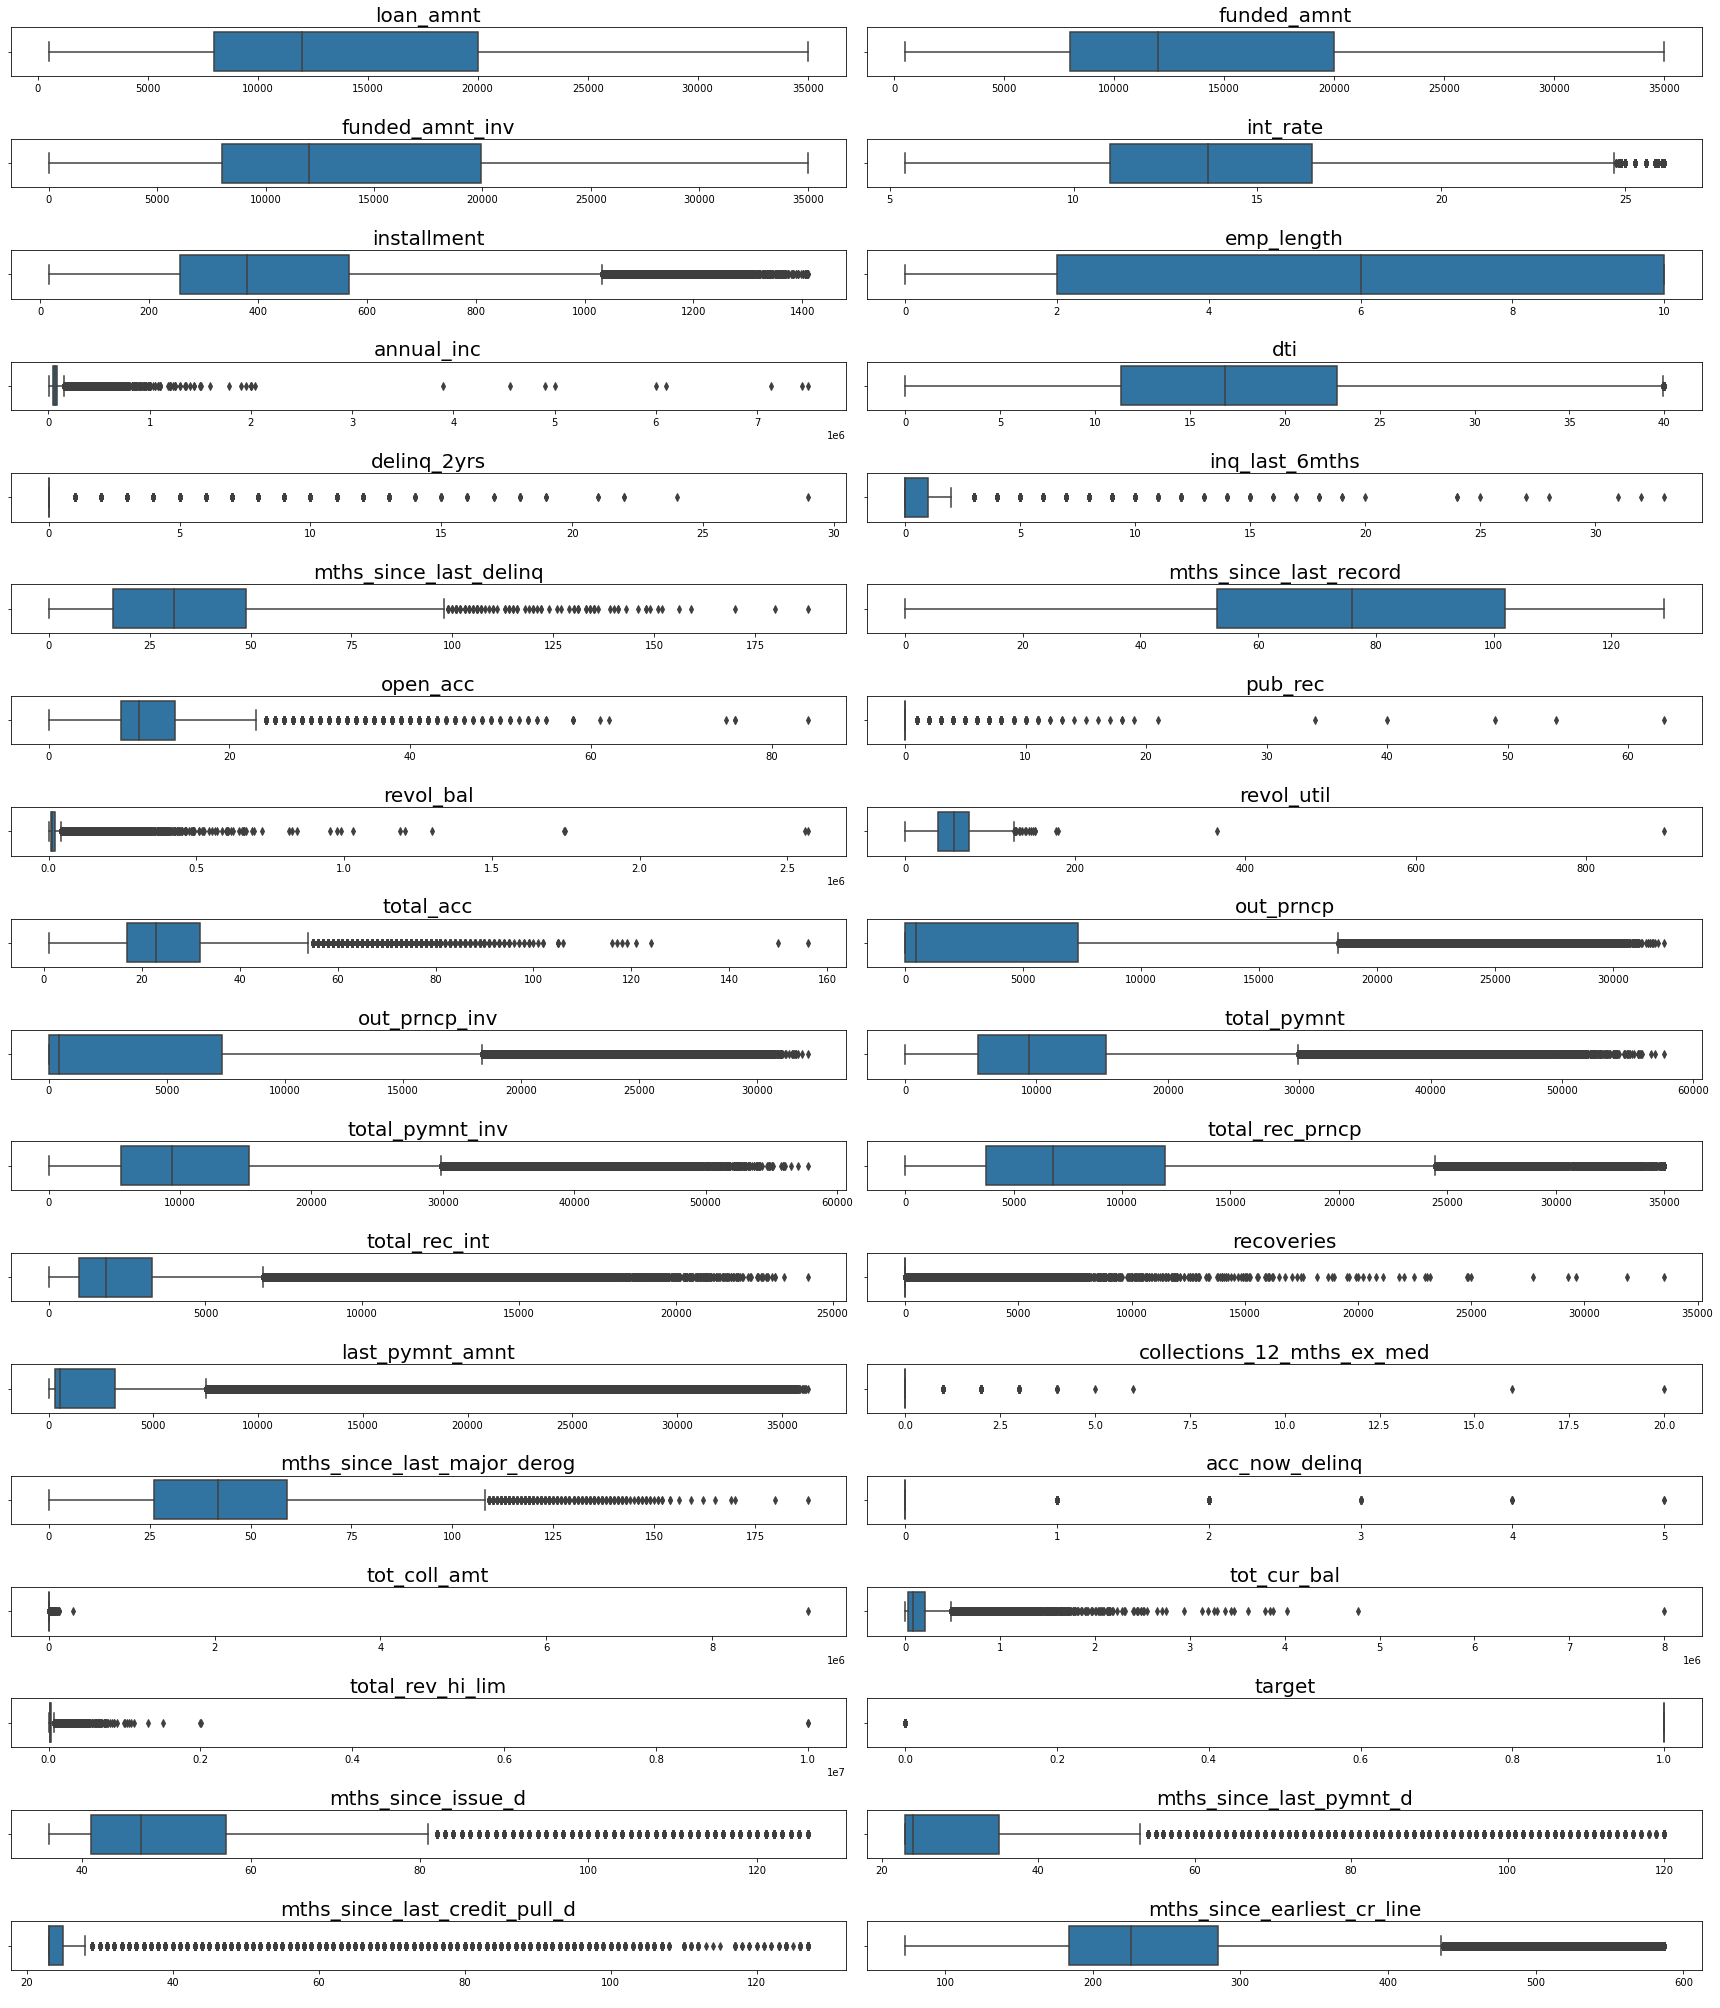

In [13]:
plt.figure(figsize=(24, 28))

for i in range(0, len(var_num)):
    plt.subplot(18, 2, i + 1)
    sns.boxplot(x = dados_eda[var_num[i]])
    plt.title(var_num[i], fontsize = 20)
    plt.xlabel(' ')
    plt.tight_layout()

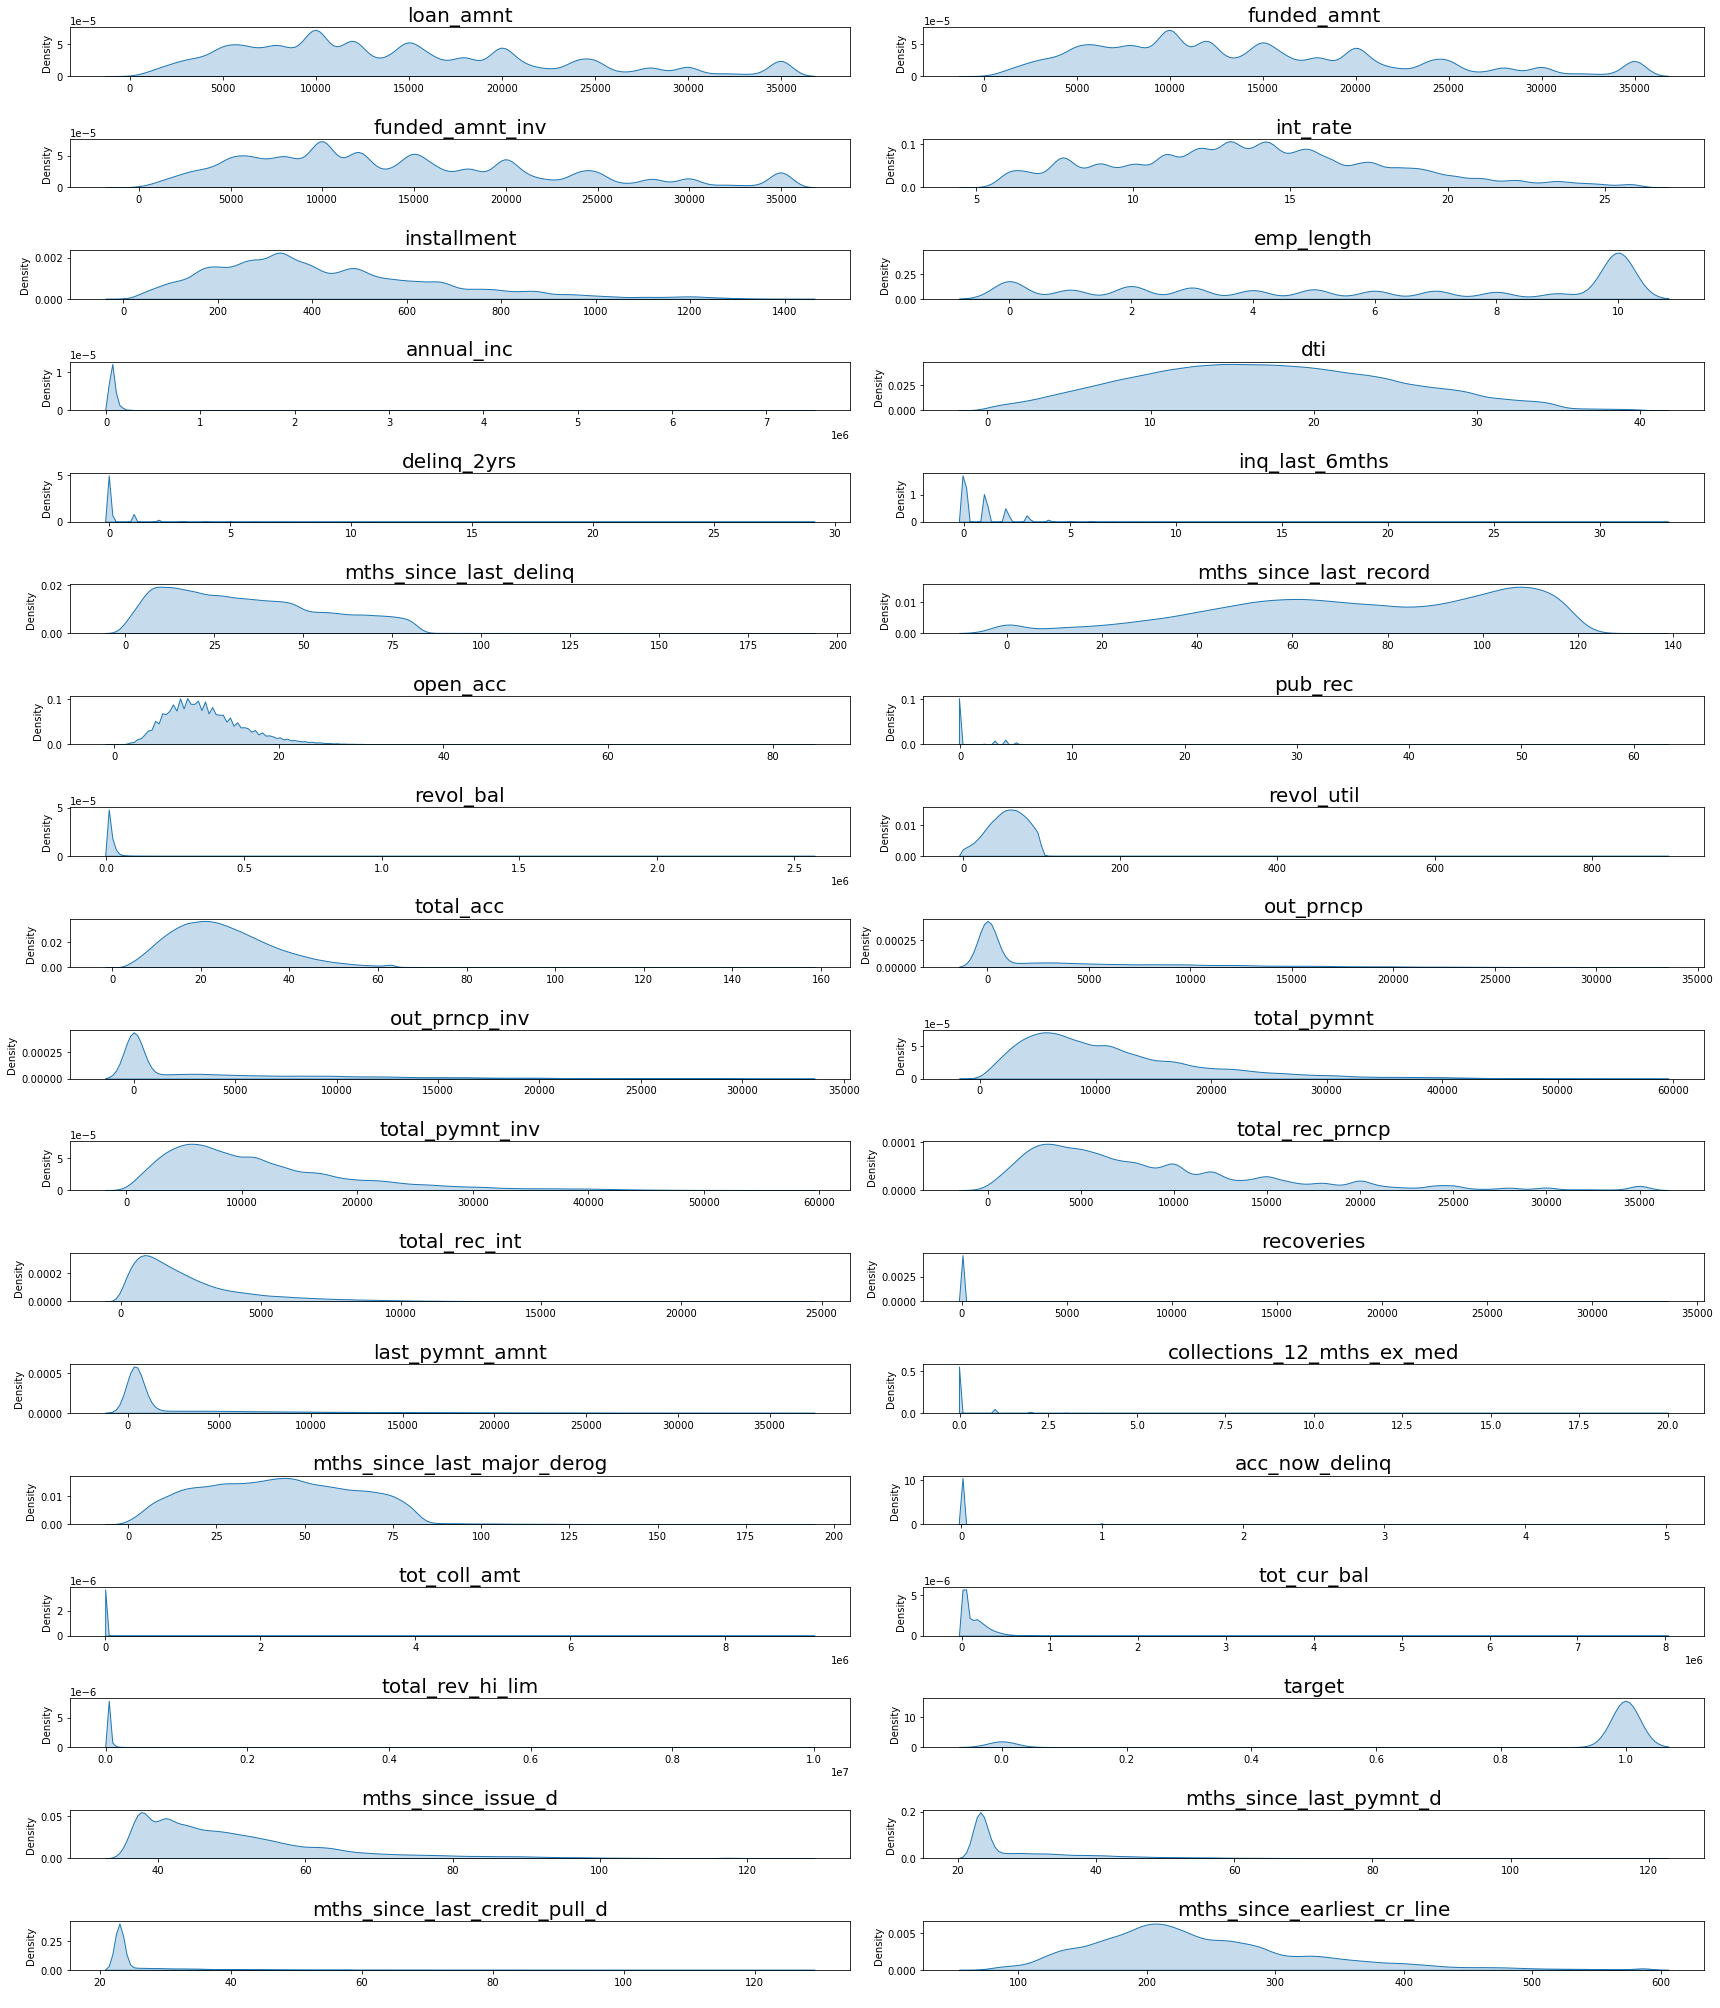

In [14]:
plt.figure(figsize=(24, 28))

for i in range(0,len(var_num)):
    plt.subplot(18, 2, i + 1)
    sns.kdeplot(x = dados_eda[var_num[i]], shade = True)
    plt.title(var_num[i], fontsize = 20)
    plt.xlabel(' ')
    plt.tight_layout()

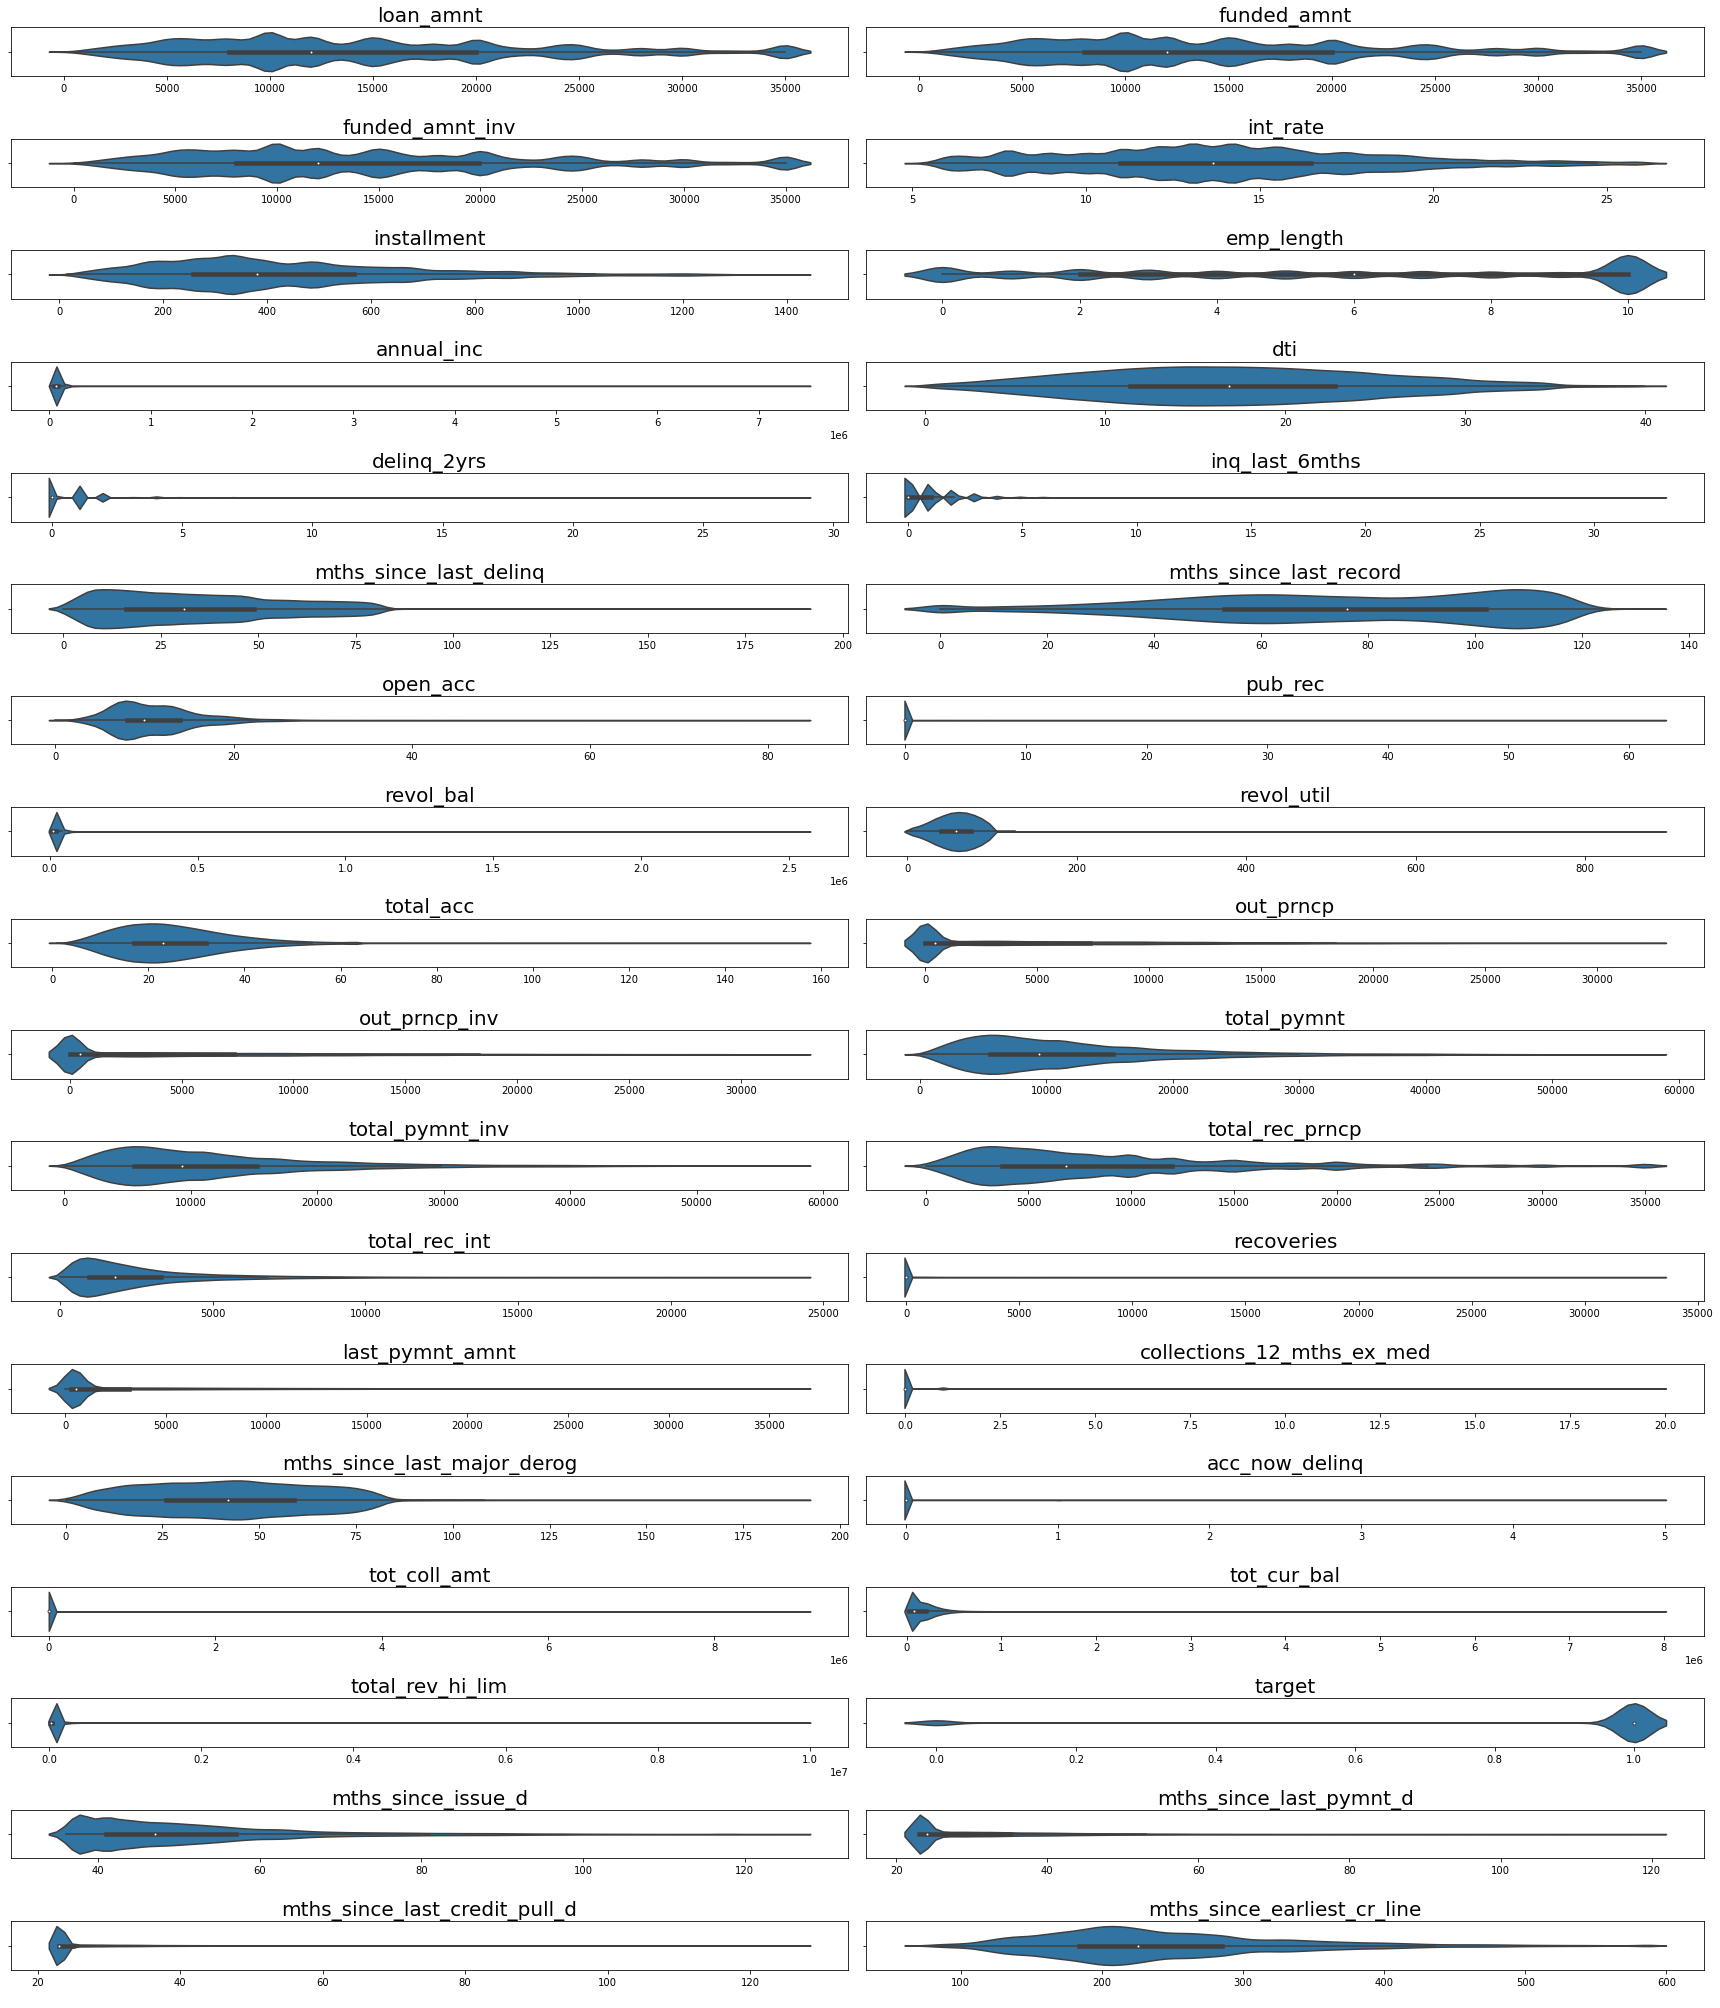

In [15]:
plt.figure(figsize=(24, 28))

for i in range(0,len(var_num)):
    plt.subplot(18, 2, i + 1)
    sns.violinplot(x = dados_eda[var_num[i]], shade = True)
    plt.title(var_num[i], fontsize = 20)
    plt.xlabel(' ')
    plt.tight_layout()

### 1.3.2 Avaliando a distribuição das variáveis categóricas

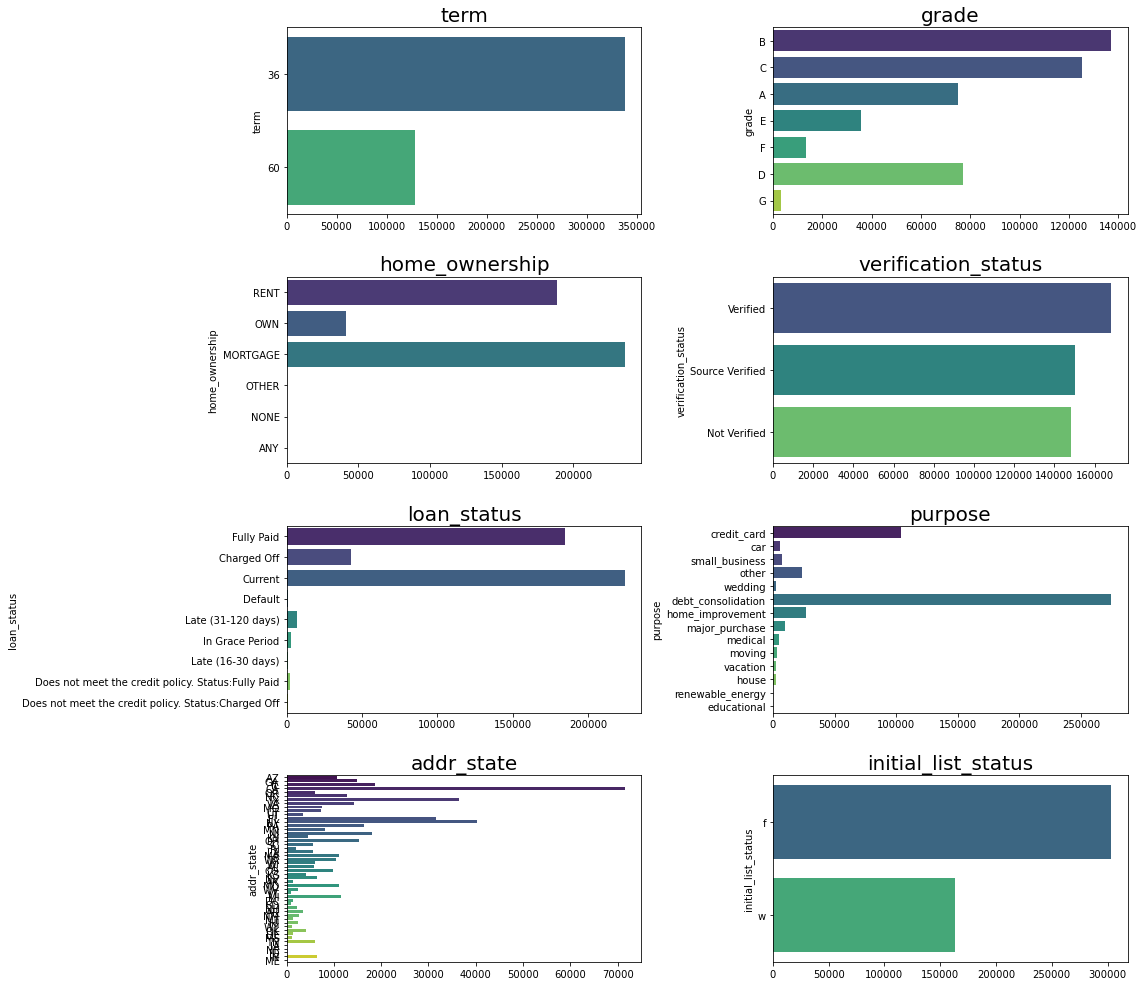

In [16]:
plt.figure(figsize=(16, 14))

for i in range(0, len(var_cat)):
    plt.subplot(4, 2, i + 1)
    sns.countplot(y = dados_eda[var_cat[i]], palette = 'viridis')
    plt.title(var_cat[i], fontsize = 20)
    plt.xlabel(' ')
    plt.tight_layout()

### 1.3.3 Análise univariada dos dados numéricos com a variável target

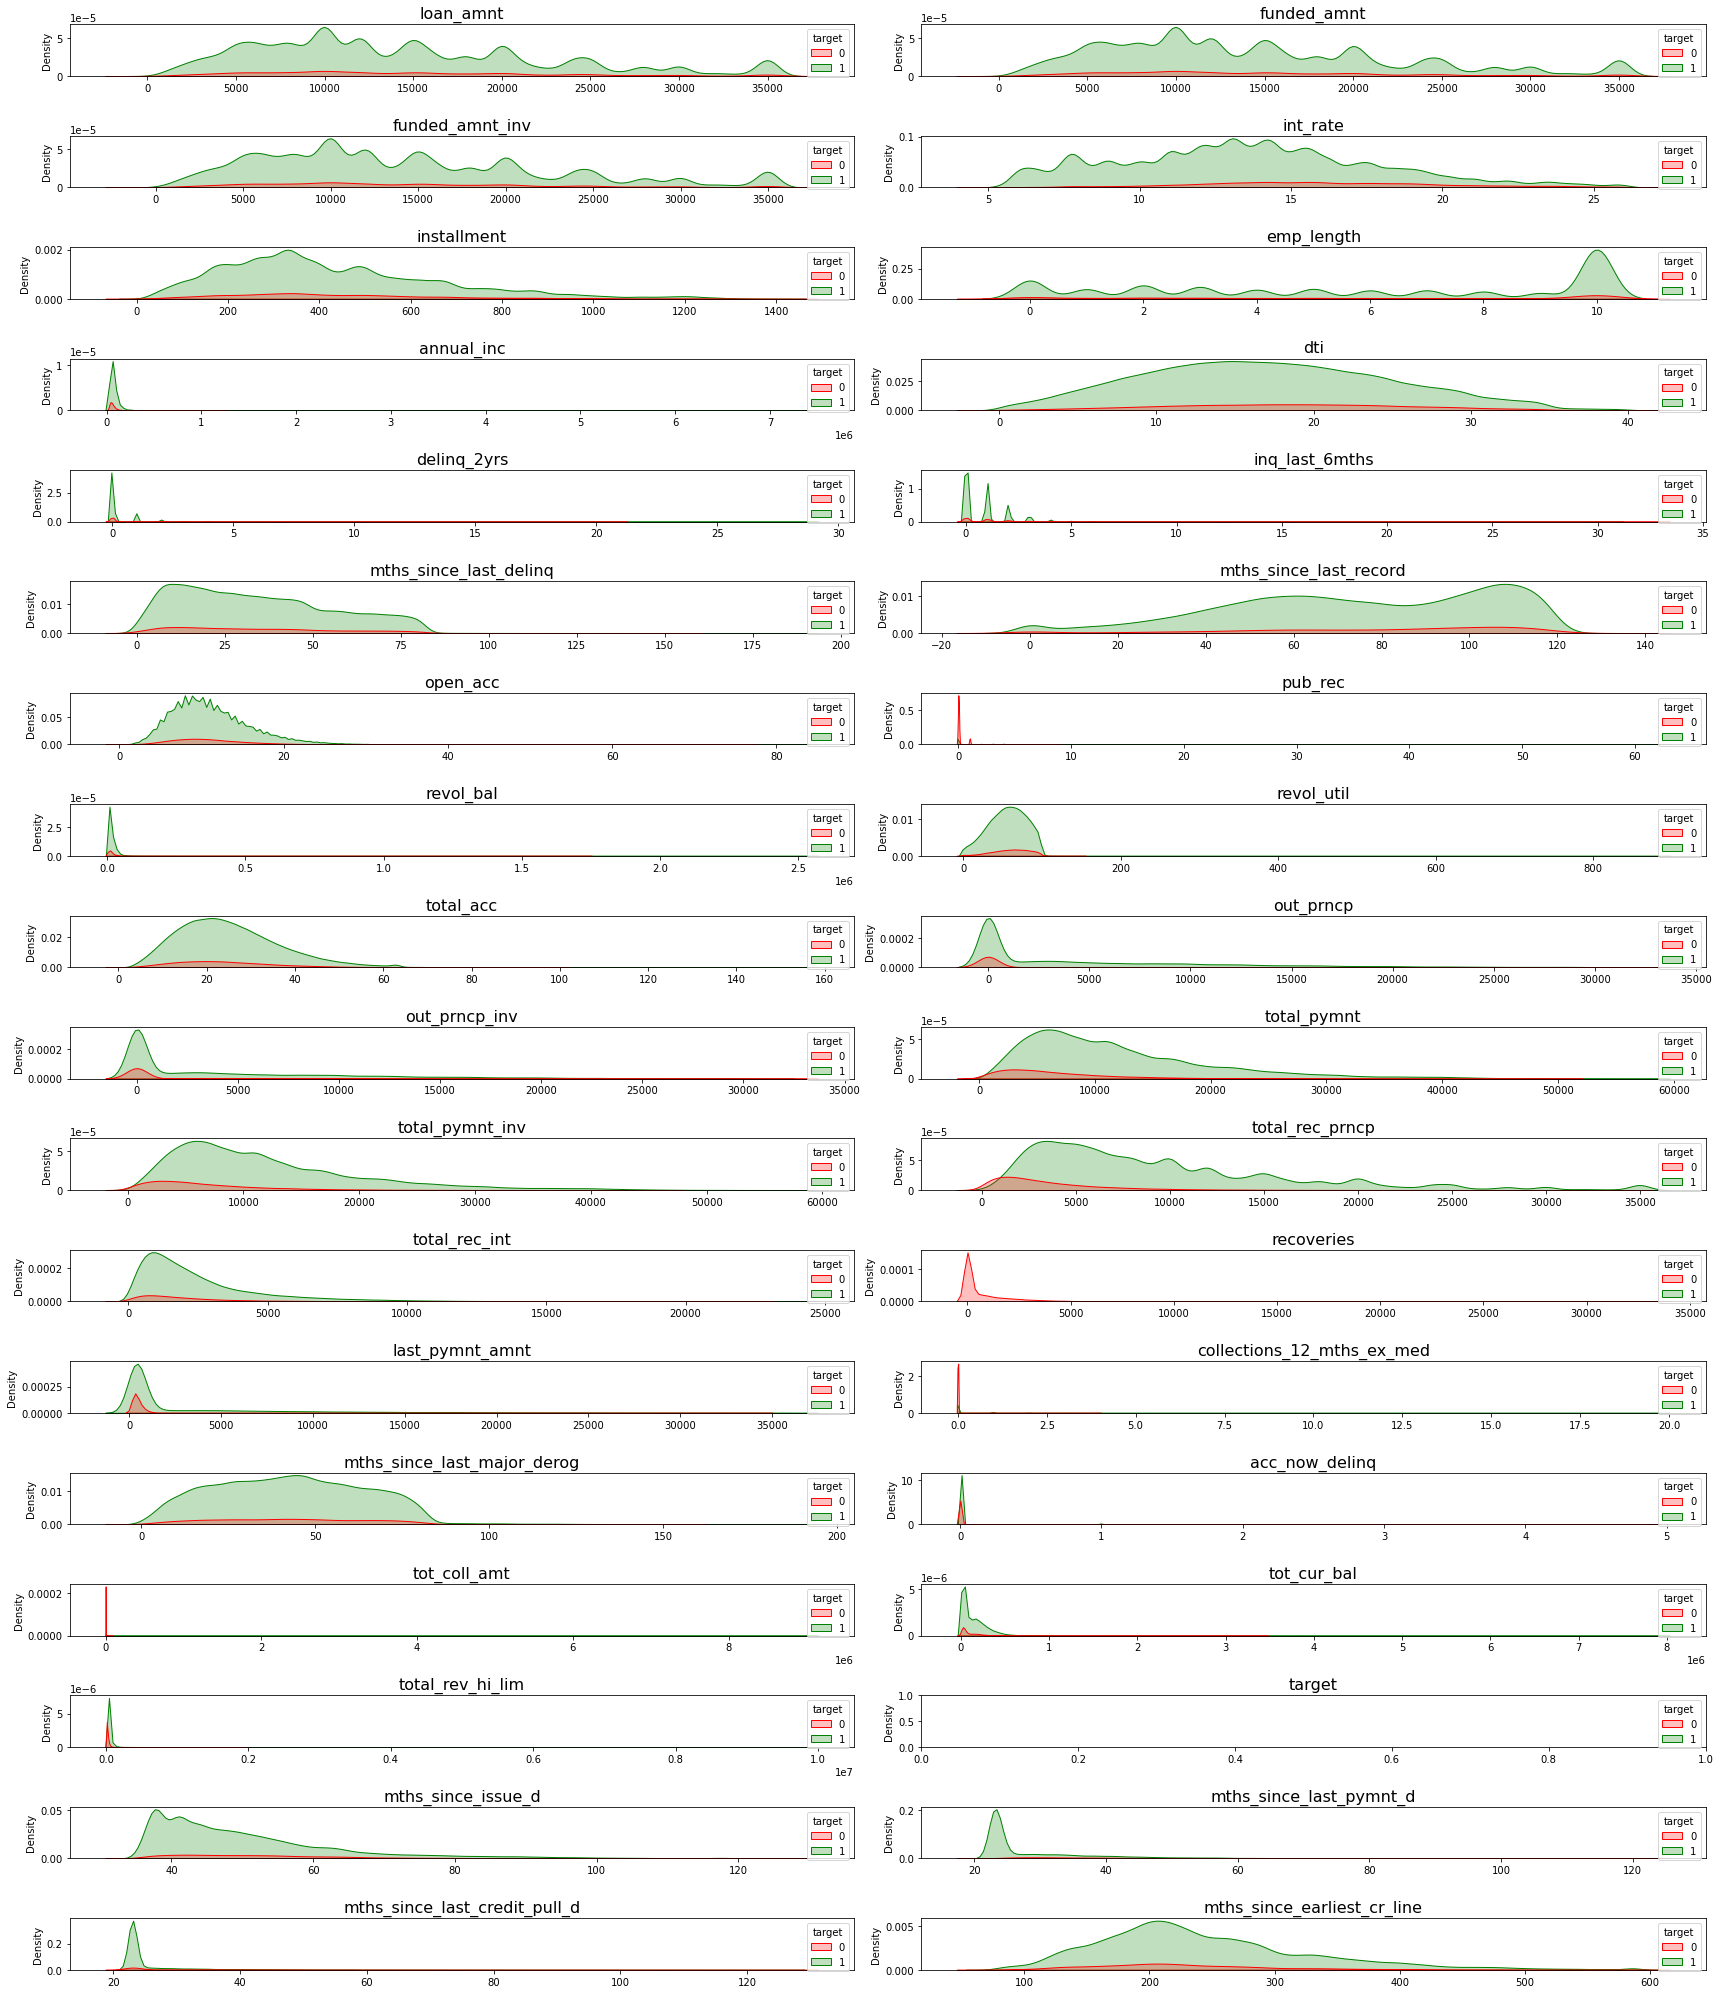

In [17]:
plt.figure(figsize=(24, 28))

for i in range(0,len(var_num)):
    plt.subplot(18, 2, i + 1)
    sns.kdeplot(x = dados_eda[var_num[i]], 
                palette = ['red', 'green'], 
                shade = True, 
                hue = dados_eda['target'],
                warn_singular = False)
    
    plt.title(var_num[i], fontsize = 16)
    plt.xlabel(' ')
    plt.tight_layout()

### 1.3.4 Análise univariada dos dados categóricos com a variável target

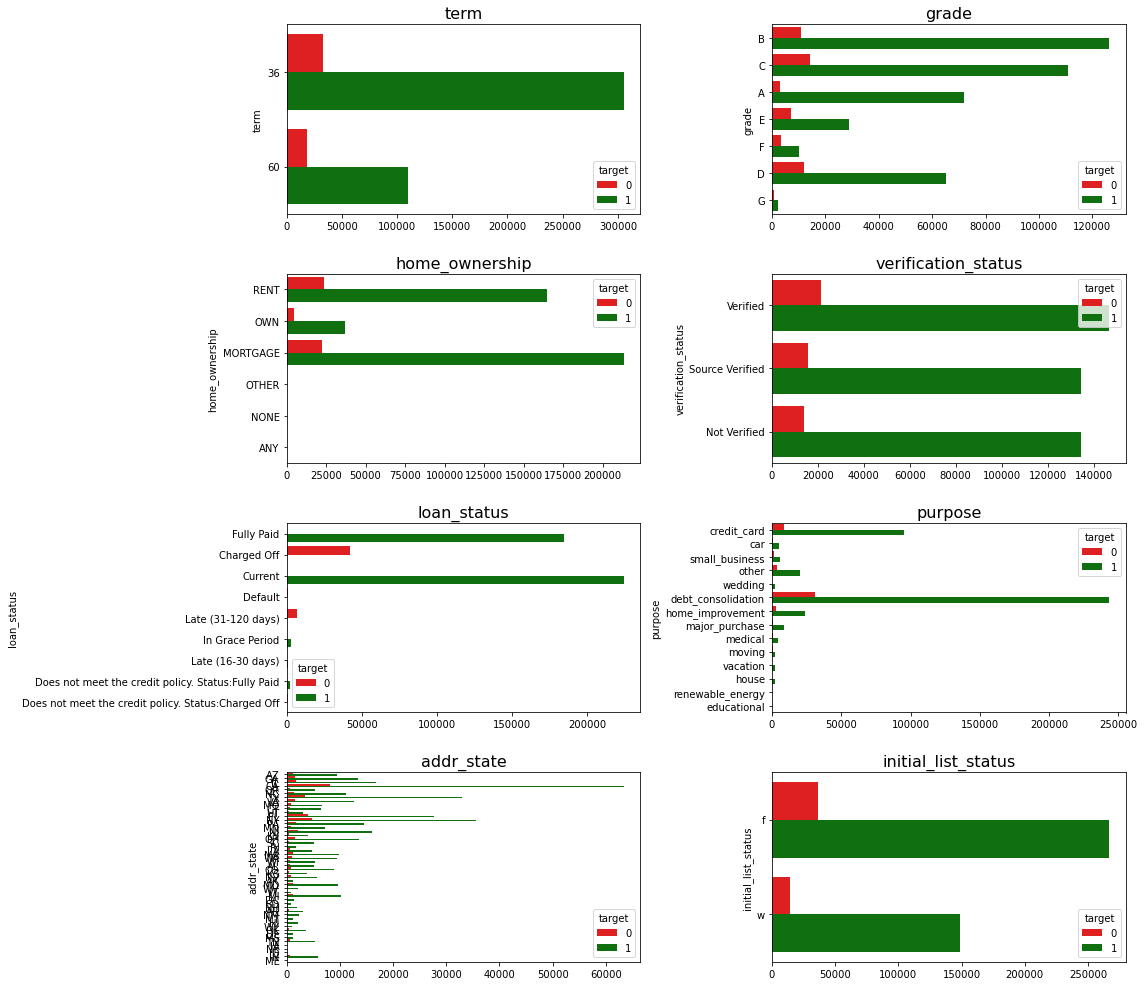

In [18]:
plt.figure(figsize=(16, 14))

for i in range(0, len(var_cat)):
    plt.subplot(4, 2, i + 1)
    sns.countplot(y = dados_eda[var_cat[i]], palette = ['red', 'green'], hue = dados_eda['target'])
    plt.title(var_cat[i], fontsize = 16)
    plt.xlabel(' ')
    plt.tight_layout()

## 1.4 Análise bivariada

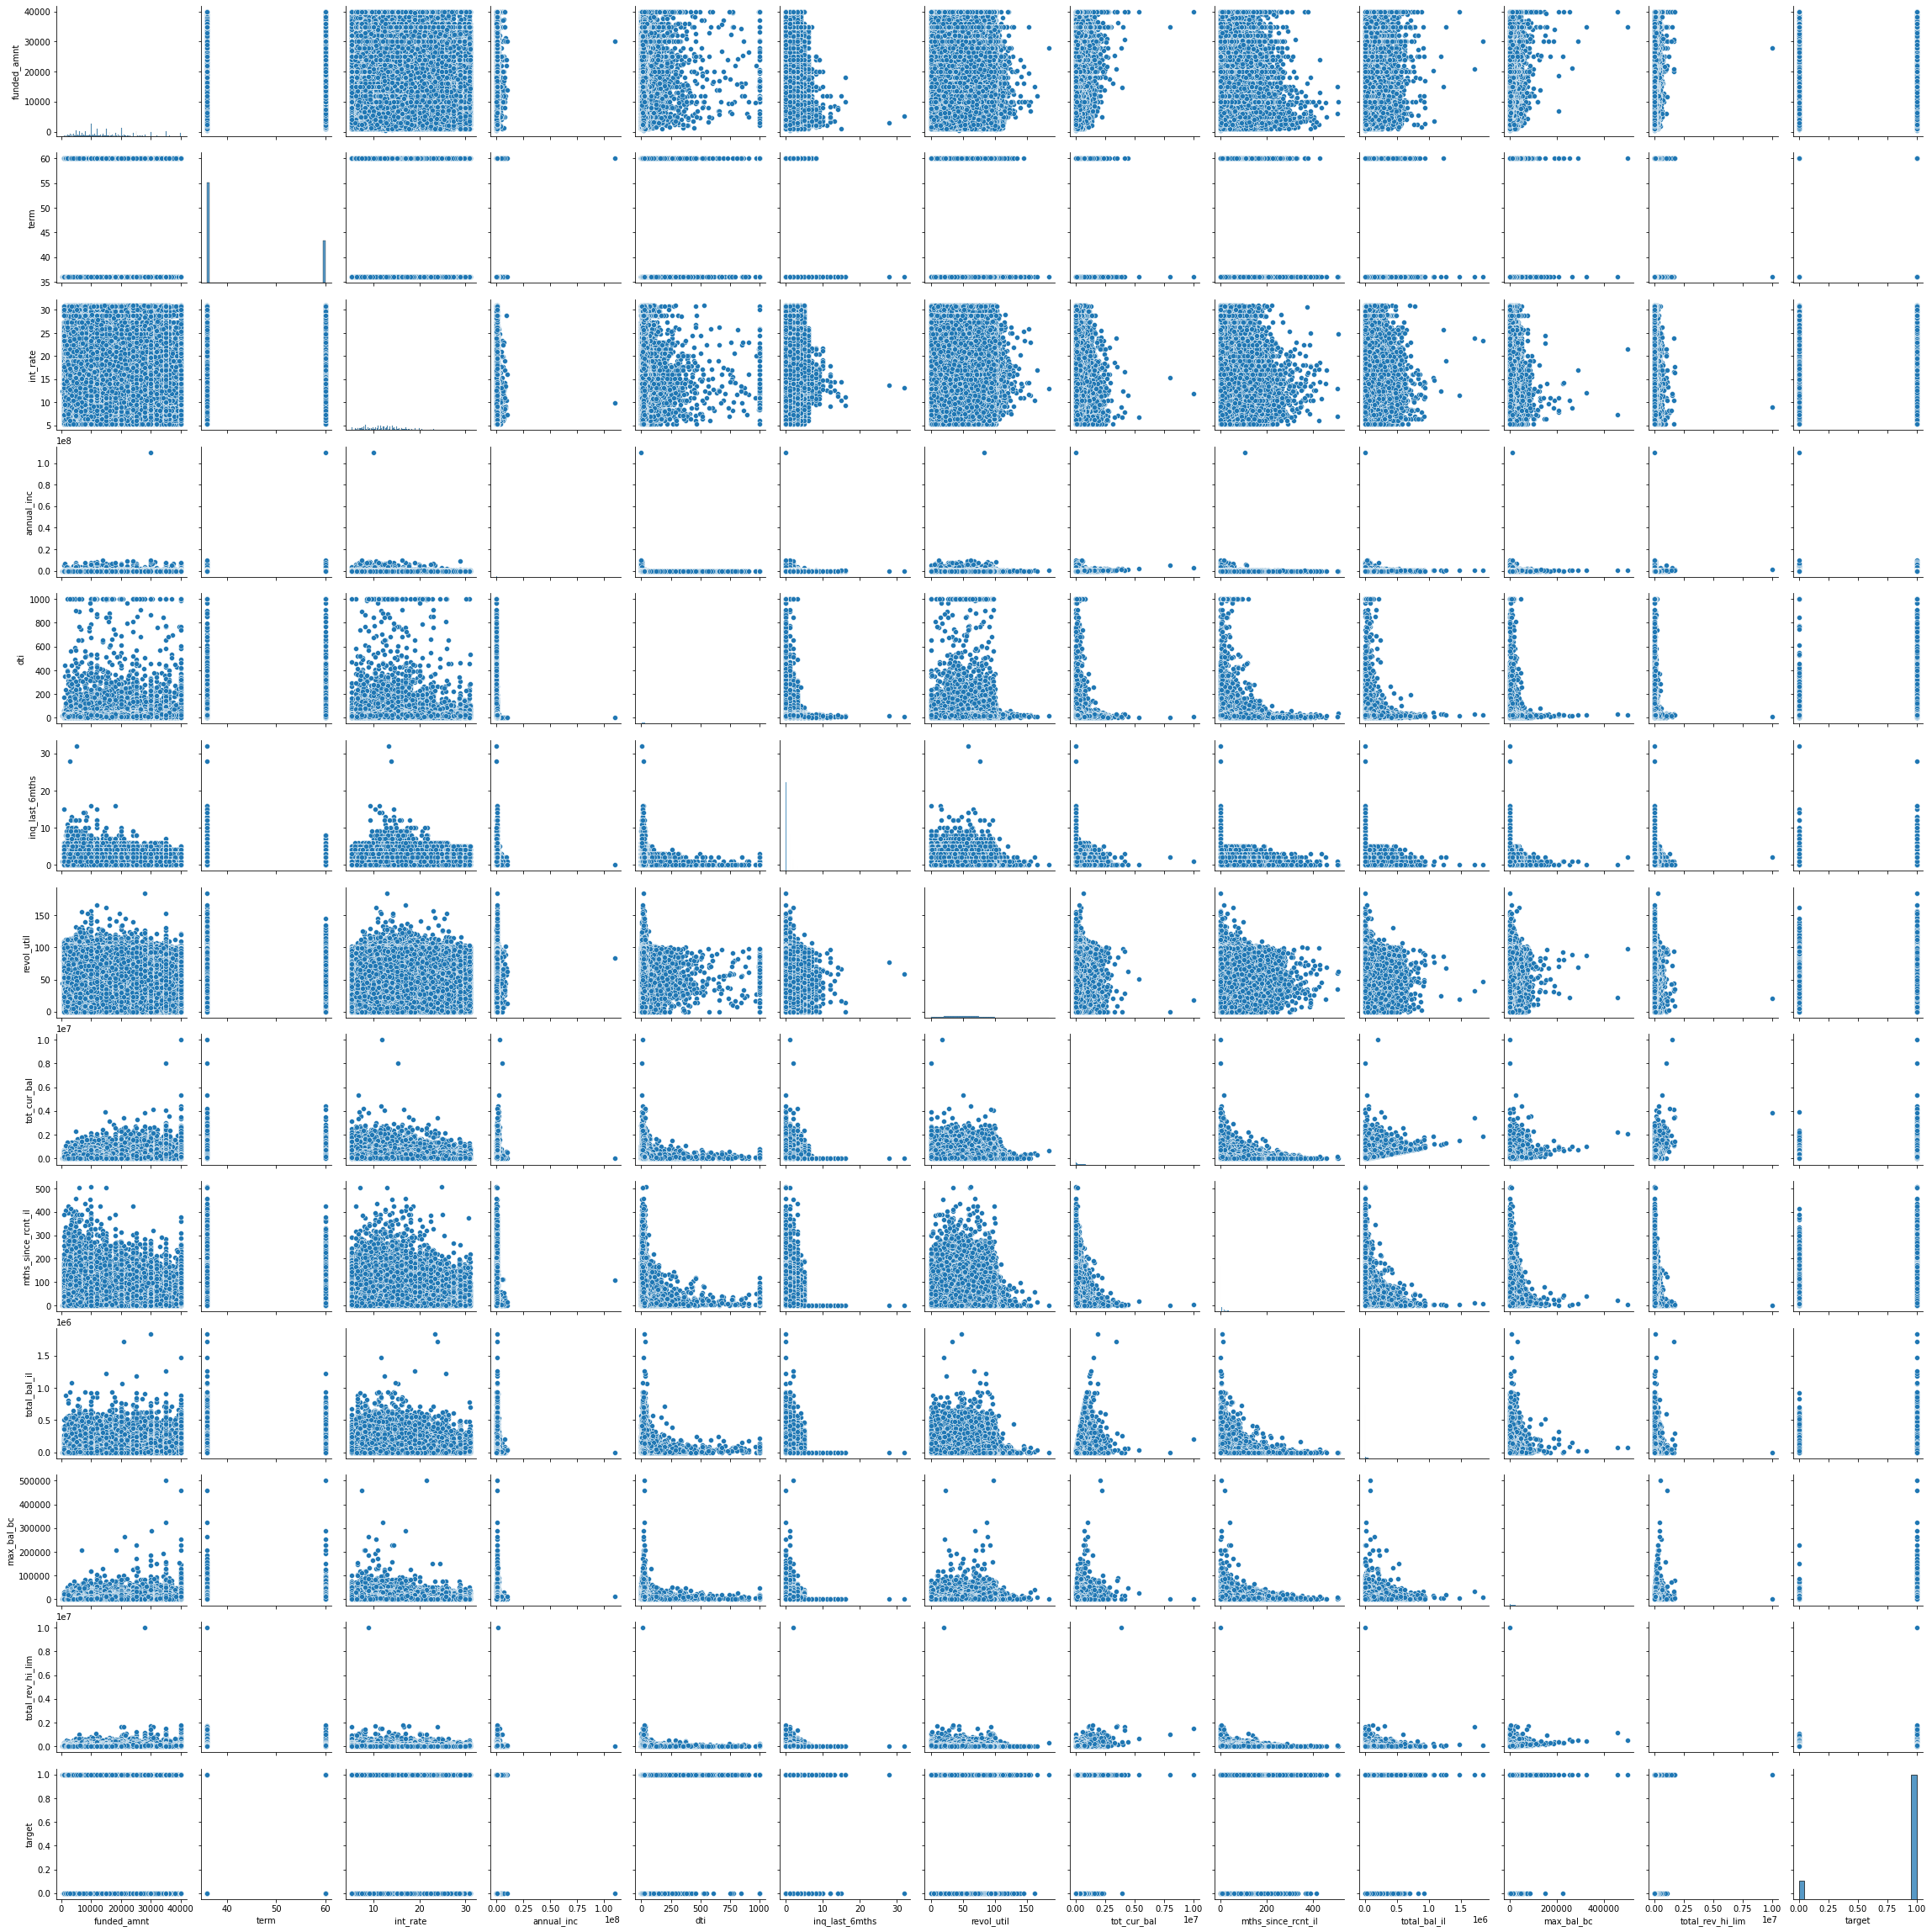

In [15]:
# pairplot das variáveis

sns.pairplot(dados_eda);

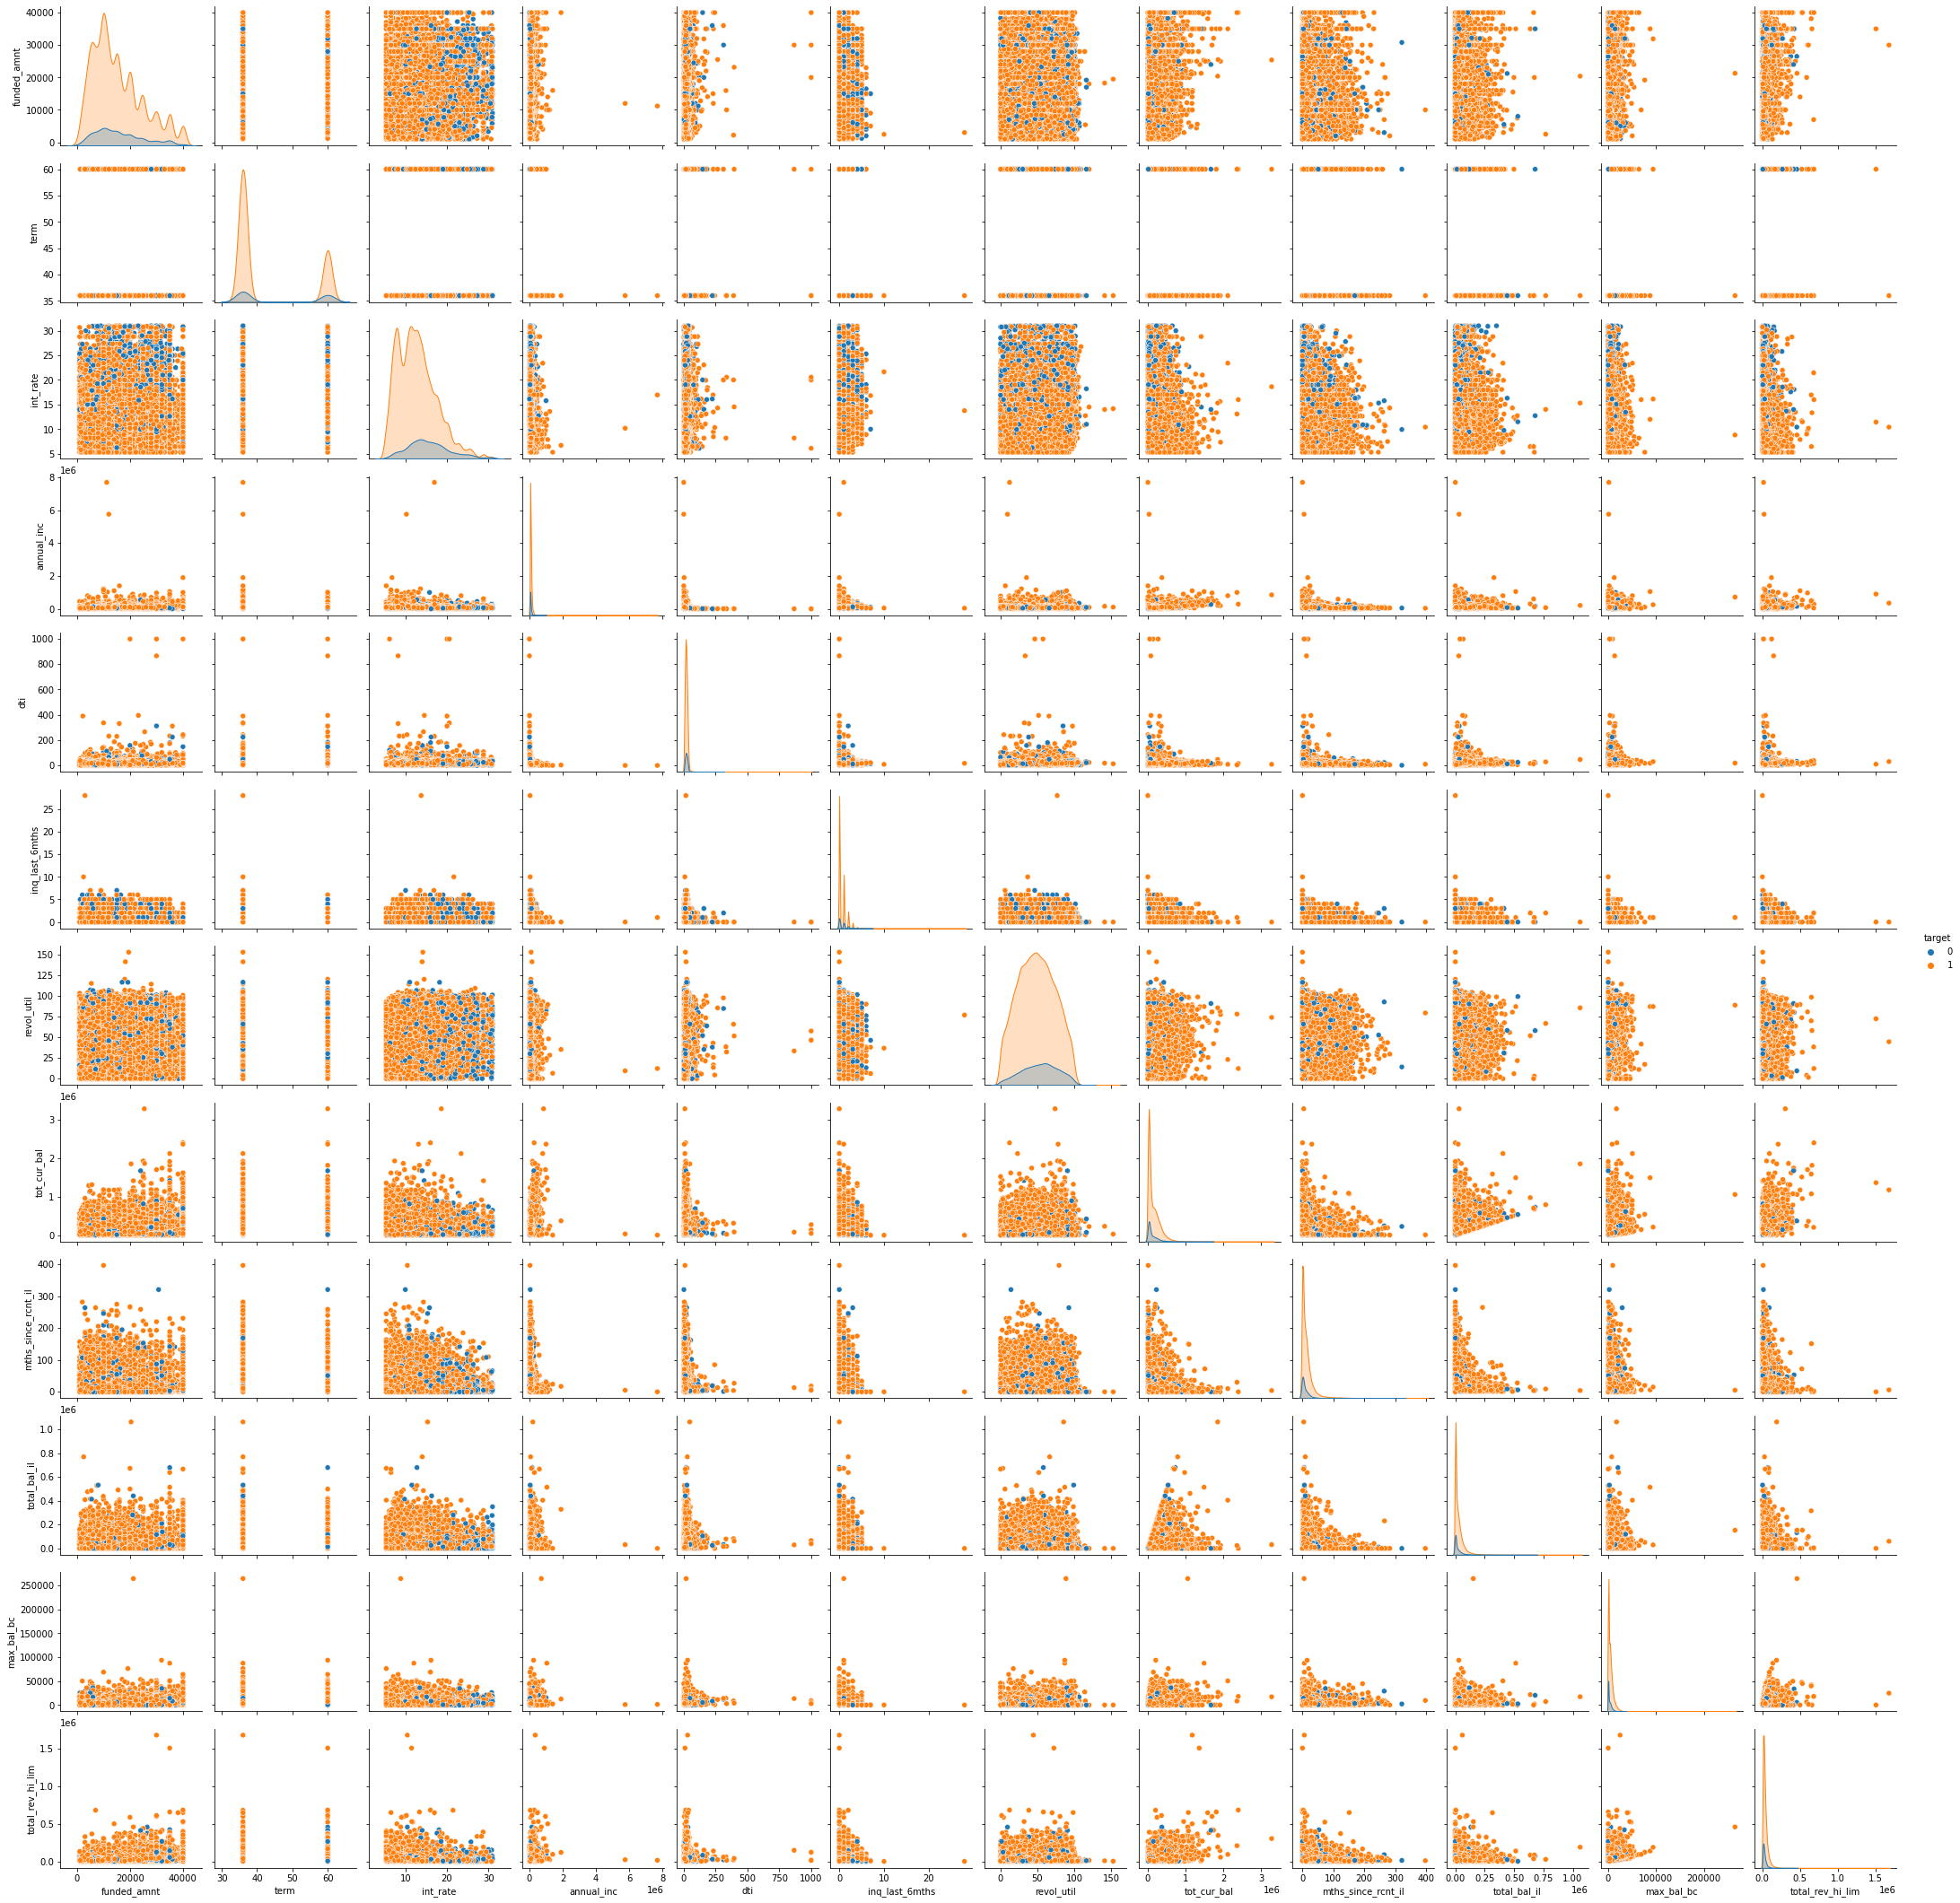

In [17]:
# pairplot usando target como hue

sns.pairplot(dados_eda, hue = 'target');

### 1.4.1 Análise comparativa da média, mediana e desvio e a variável fraude

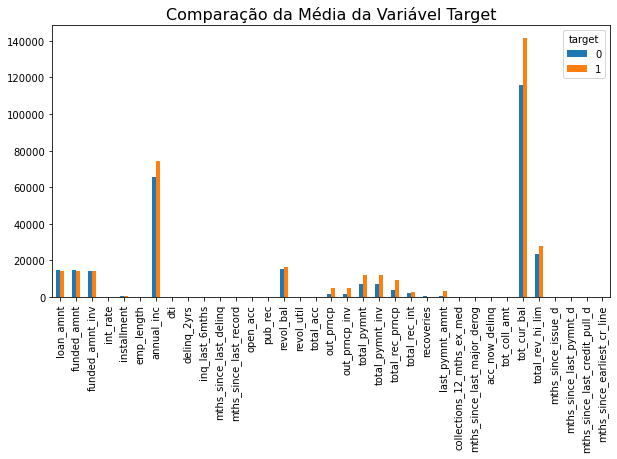

In [19]:
_, ax = plt.subplots(1, 1, figsize=(10, 5))
dados_eda.groupby('target', as_index = True).mean().T.plot(kind = 'bar', ax = ax, rot = 90)
plt.title('Comparação da Média da Variável Target', fontsize = 16);

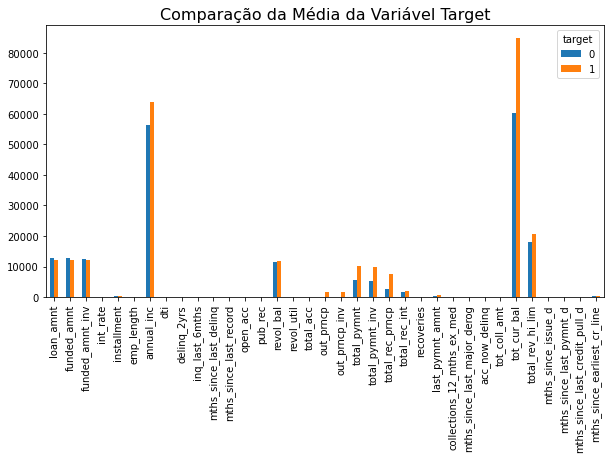

In [20]:
_, ax = plt.subplots(1, 1, figsize=(10, 5))
dados_eda.groupby('target', as_index = True).median().T.plot(kind = 'bar', ax = ax, rot = 90)
plt.title('Comparação da Média da Variável Target', fontsize = 16);

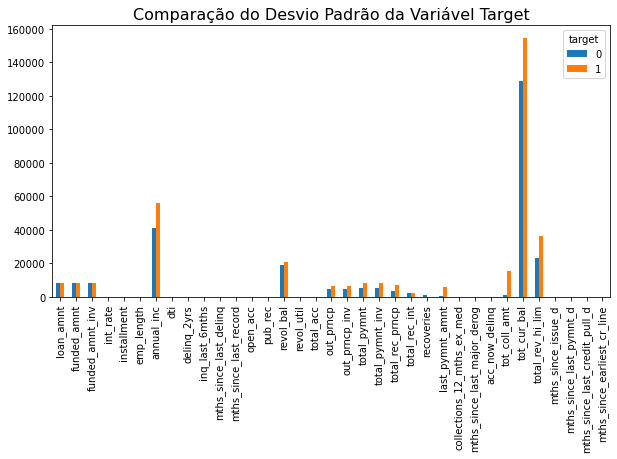

In [21]:
_, ax = plt.subplots(1, 1, figsize=(10, 5))
dados_eda.groupby('target', as_index = True).std().T.plot(kind = 'bar', ax = ax, rot = 90)
plt.title('Comparação do Desvio Padrão da Variável Target', fontsize = 16);

## 1.5 Correlação

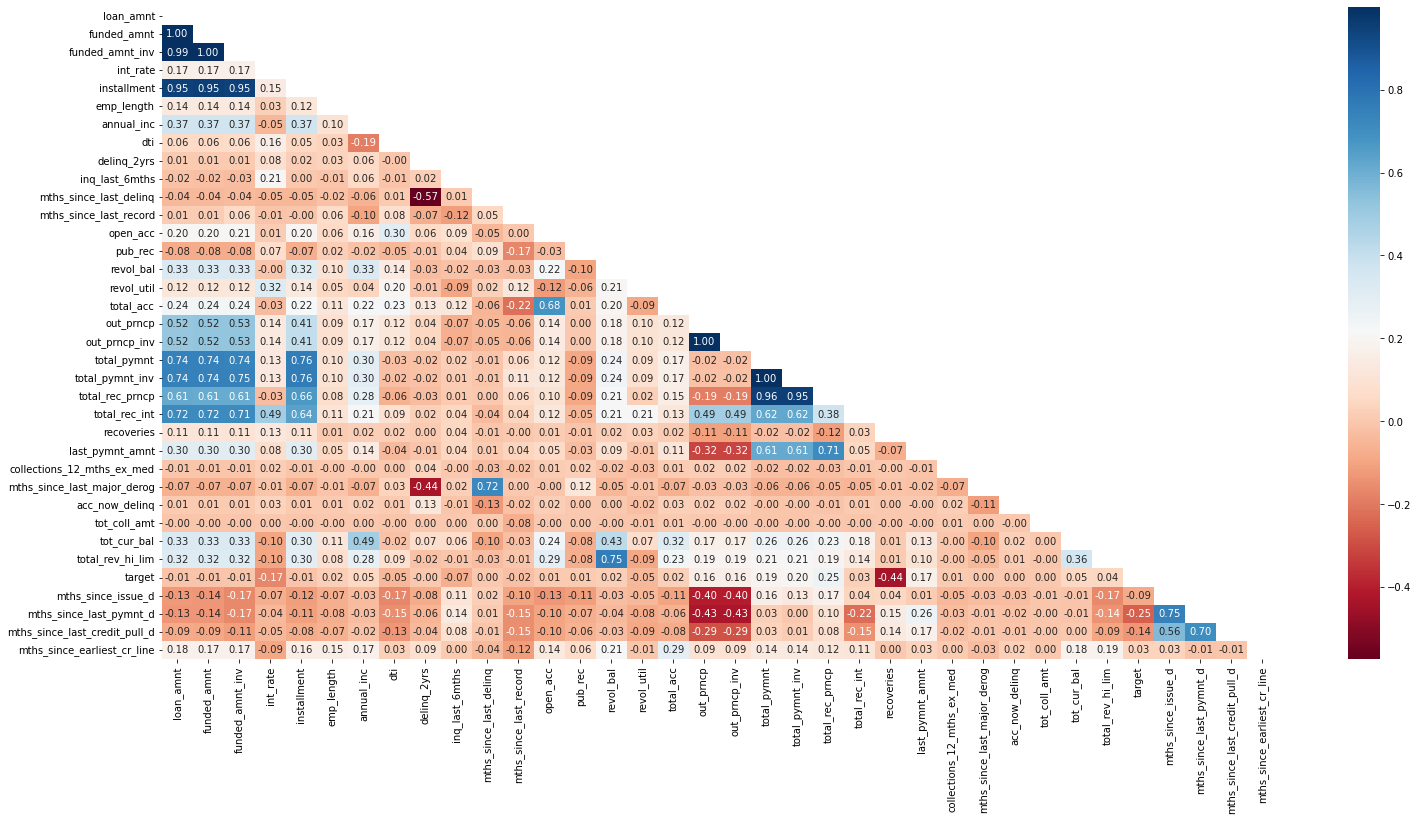

In [25]:
# matriz de correlação das variáveis 

sns.set_context(font_scale = 1.9)
plt.figure(figsize = (25, 12))
sns.heatmap(
    dados_eda.corr(), 
    annot = True, 
    fmt = '.2f', 
    cmap = 'RdBu',
    mask = np.triu(
        np.ones_like(dados_eda.corr()) 
    ) 
);

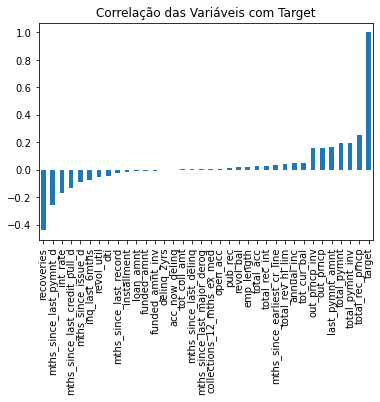

In [23]:
dados_eda.corr()['target'].sort_values().plot(kind = 'bar')
plt.title('Correlação das Variáveis com Target');

---